# Car Price Prediction 


### Business Problem: 

This project is to create an algorithm that predicts used car price based on the Car dataset.This dataset contains information about used cars listed on different websites. The data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning. i need to predict the Selling price is my target feature and all other features are independant variable. Selling price is my y-hat.

The columns in the given dataset is as follows:
- Car_Name
- Year
- Selling_Price
- Present_Price
- Kms_Driven
- Fuel_Type
- Seller_Type
- Transmission
- Owner

## 1.  Data Preprocessing

Dataset Link: https://drive.google.com/file/d/1DSw-sZcgFW804ACLp1CkJIos2SVlj7RN/view?usp=share_link

### Importing Libraries and loading data set

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [296]:
url="C:/Users/beemu/Downloads/Projects data sets/car data.csv"
data=pd.read_csv(url)
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Exploration

In [297]:
# Checking dataset Shape
data.shape

(301, 9)

In [298]:
# Checking dataset columns
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [299]:
# Checking dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [300]:
# Checking Categorical columns 
data.select_dtypes(include='object').columns




Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [301]:
# Checking the Length of categorical columns
len(data.select_dtypes(include='object').columns)

4

In [302]:
# Checking columns with numerical values
data.select_dtypes(include=['float64','int64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [303]:
# Checking the length of the numerical values
len(data.select_dtypes(include=['float64','int64']).columns)

5

In [304]:
# Checking the statistical summary
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Dealing with missing values

In [305]:
data.isnull().values.any()

False

In [306]:
data.isnull().values.sum()

0

#### Restructuring the Data set

In [307]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [308]:
# we drop car_name  column because it is not correlated to the selling price
data=data.drop(columns='Car_Name')

In [309]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [310]:
#add column (Current year)
data['Current Year']=2023

In [311]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [312]:
# Creating Years Old colunm 
data['Years Old'] = data['Current Year']-data['Year']
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Years Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [313]:
# Dropping the columns
data= data.drop(columns=['Current Year','Year'])
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


### Encoding the Categorical data

In [314]:
data.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [315]:
len(data.select_dtypes(include='object').columns)

3

In [316]:
data['Fuel_Type'].nunique()  # 3 proposed unique values

3

In [317]:
data['Seller_Type'].nunique()  # 2 proposed unique values

2

In [318]:
data['Transmission'].nunique()  # 2 proposed unique values

2

In [319]:
data.shape

(301, 8)

In [320]:
# We use one hot encoding - a process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a mode

data=pd.get_dummies(data=data,drop_first=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [321]:
data.shape

(301, 9)

### Correlation Matrix

In [322]:
data_2 = data.drop(columns='Selling_Price')

<AxesSubplot:title={'center':'Correlated with Selling Price'}>

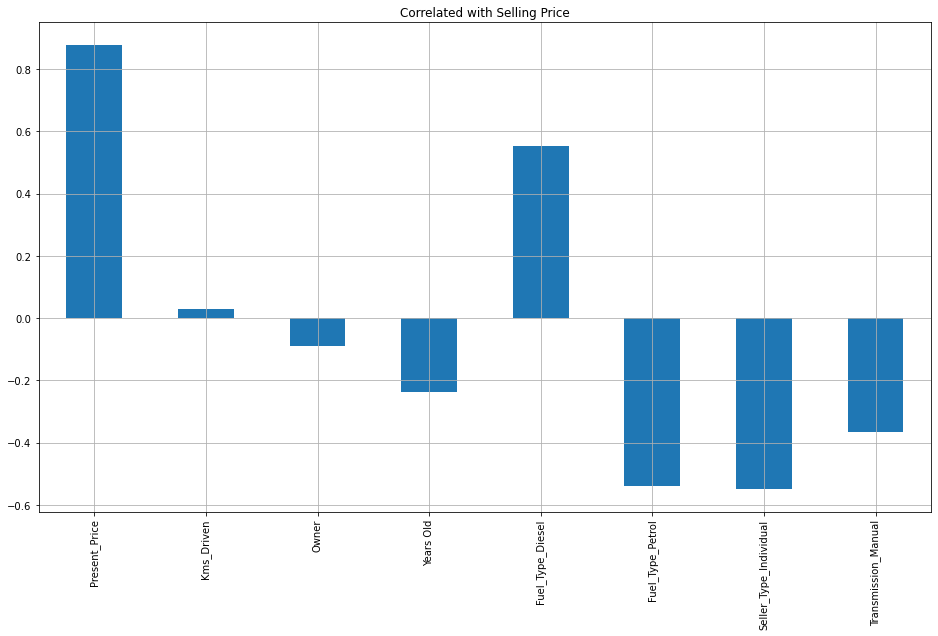

In [323]:
data_2.corrwith(data['Selling_Price']).plot.bar(figsize=(16,9)
                                              ,title='Correlated with Selling Price',grid=True
                                              )

# Present Price and type fuel type diesel  are positive correlated to the Selling price 
# type petrol seller type individual and transmission manual are negatively correlated to selling price

In [324]:
corr=data.corr()

<AxesSubplot:>

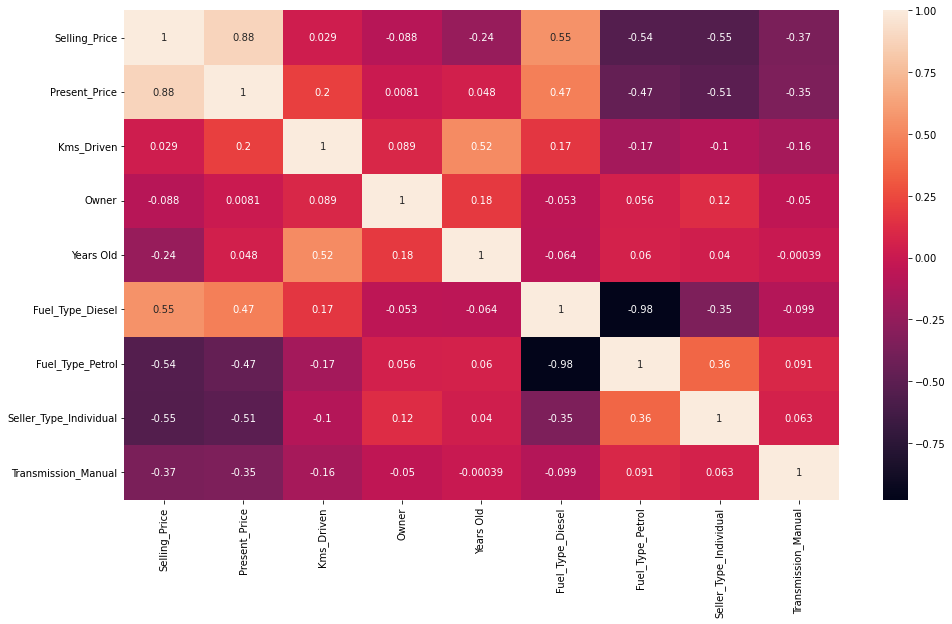

In [325]:
# Heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

### Splitting the Data Set

In [326]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [327]:
# We need to specify x and y
# matrix of features

X=data.drop(columns='Selling_Price')

In [328]:
# defining the traget variable y-hat

Y =data['Selling_Price']

In [329]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [330]:
X_train.shape

(240, 8)

In [331]:
X_test.shape

(61, 8)

In [332]:
Y_train.shape

(240,)

In [333]:
Y_test.shape

(61,)

### Feature Scaling

- For this model we are going to use linear regression model and random forest model
- These model do not require feauture scaling 
- Hence we are not going to do any feature scaling for this specific business problem

##  2. Building The Model 

### 1. Multiple linear regression

In [334]:
# We are going to use linear model from sklearn, we navigate to sklearn and click on API and select linear model and import

from sklearn.linear_model import LinearRegression
regressor_mlr=LinearRegression()
regressor_mlr.fit(X_train,Y_train)

LinearRegression()

In [335]:
Y_pred=regressor_mlr.predict(X_test)


- R2 Score

In [336]:
# r2_score - Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse), process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a mode
from sklearn.metrics import r2_score 


In [337]:
r2_score(Y_test,Y_pred) # The MLR is performing great

0.914434297222852

### 2. Random Forest regression

In [338]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf=RandomForestRegressor()
regressor_rf.fit(X_train,Y_train)

RandomForestRegressor()

In [339]:
Y_pred=regressor_rf.predict(X_test)

In [340]:
r2_score(Y_test,Y_pred)

0.9551076763901594

- Linear regression r2 score is 0.91 whereas Random forest regression is 0.97 
- These results show that Random Forest Algorithm is working better than the Linear regression algorithm 
- Therefore we chose <b> Random Forest regression Algorithm</b> as our Model algorithm

## 3. Finding the Optimal parameters using RandomisedSearch CV

In [341]:
from sklearn.model_selection import RandomizedSearchCV


In [342]:
parameters = {
    
    'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
    'criterion':['mse',',mae'],
    'max_depth':[10,20,30,40,50],
    'min_samples_split':[2,5,10,20,50],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['auto','sqrt','log2']
       
}

In [343]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['mse', ',mae'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [344]:
random_cv=RandomizedSearchCV(estimator=regressor_rf,param_distributions=parameters,n_iter=10,
                            scoring='neg_mean_absolute_error',cv=5,verbose=2,n_jobs=-1)

In [345]:
# Training the model
random_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\beemu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\beemu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\beemu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\beemu\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\beemu\anaconda3\lib\site-packages\jo

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', ',mae'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [346]:
random_cv.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=30, max_features='auto',
                      min_samples_split=20, n_estimators=700)

In [347]:
random_cv.best_params_

{'n_estimators': 700,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'mse'}

## Final Model (Random Forest)




In [348]:
# Copy the Random Forest Regressor Model Code
# Copy the best Estimator
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,Y_train)

RandomForestRegressor()

* <b>Model Prediction

In [349]:
Y_pred=regressor.predict(X_test)

* <b> Test model R2 score

In [350]:
r2_score(Y_test,Y_pred)

0.9634343540472581

## Predicvting a single observation

In [351]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [352]:
# Single obseravtion
single_obs= [[10,8000,1,7,0,1,0,0]]

In [353]:
regressor.predict(single_obs)

C:\Users\beemu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.8031])

Results of the Model are

For a Honda Fit (2016) Model are
        - Present price      $10000
        - Kms Driveen        80000
        - Owner              1
        - Years old          7
        - Fuel type          1
        - Transmision Manual 0  
        
<b> The price of the car should be $ 7.8031
 
 Which is <b> $7.8 usd 
        